In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
from collections import Counter 

In [3]:
data = pd.read_csv('../datafiles/ground_truth.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               2062 non-null   int64 
 1   App id                   2062 non-null   object
 2   Review id                2062 non-null   object
 3   Sentence id              2062 non-null   int64 
 4   Sentence content         2062 non-null   object
 5   Feature (Positive)       291 non-null    object
 6   Feature (Neutral)        638 non-null    object
 7   Feature (Negative)       110 non-null    object
 8   Feature (All Annotated)  971 non-null    object
 9   Count All Features       2062 non-null   int64 
 10  Count Positive Features  2062 non-null   int64 
 11  Count Negative Features  2062 non-null   int64 
 12  Count Neutral Features   2062 non-null   int64 
 13  Count Terms              2062 non-null   object
dtypes: int64(6), object(8)
memory usage: 225

In [5]:
data.head(10)

,App id,Review id,Sentence id,Sentence content,Feature (Positive),Feature (Neutral),Feature (Negative),Feature (All Annotated)
0,com.zentertain.photoeditor,gp:AOqpTOEW40L9WXqCjzq04bqaZImgMdzlczxIF3_ibs8...,1,May be i can check,NaN,NaN,NaN,NaN
1,com.zentertain.photoeditor,gp:AOqpTOF57AQPvmnCiWYurwLY-F2-mej25ON8RAFk-Ls...,1,It make me happy,NaN,NaN,NaN,NaN
2,com.zentertain.photoeditor,gp:AOqpTOHYdmt72q4tSD8TZ8A5fZQqGivlBkIbWuHuJMZ...,1,I have a normal phone and it made 1 of my pics...,NaN,pics,NaN,pics
3,com.zentertain.photoeditor,gp:AOqpTOFYnXMShrDJPS0jpM04pFQxYOJN1LDuX3lSNm0...,1,Love it so much,NaN,NaN,NaN,NaN
4,com.zentertain.photoeditor,gp:AOqpTOF_JO496wnThQ2kcYlPct_g1GhOmQyyVvHp4VV...,1,Cant get to install,NaN,install,NaN,install
5,com.zentertain.photoeditor,gp:AOqpTOHngsg4rH9hhnkMvmfTBetw8W5oNPFvVG4DOML...,1,Too many ads and secondly erratic interface.,NaN,ads,interface,ads;interface
6,com.zentertain.photoeditor,gp:AOqpTOHngsg4rH9hhnkMvmfTBetw8W5oNPFvVG4DOML...,2,I have already uninstalled,NaN,uninstalled,NaN,uninstalled
7,com.zentertain.photoeditor,gp:AOqpTOHKHFklimpVTY1FLORdeeT_0e6o6uZkwmM1gG-...,1,Its so happy,NaN,NaN,NaN,NaN
8,com.zentertain.photoeditor,gp:AOqpTOF-cffgSonaElAlUsEPVOIg_MuTSbvfJ2AR77g...,1,Nicest systematic for Android phones,NaN,NaN,NaN,NaN
9,com.zentertain.photoeditor,gp:AOqpTOEhoSCYpfLpjgg5PPkcRO6lsqhfUeqwpDty6Kz...,1,Its so easy and fun,NaN,NaN,NaN,NaN


In [14]:
data['App id'].value_counts()
# B004LOMB2Q - Evernote
# B005ZXWMUS - Netflix
# B0094BB4TW - Facebook
# B004SIIBGU - eBay

App id
B004LOMB2Q                    367
B005ZXWMUS                    341
B0094BB4TW                    327
B004SIIBGU                    294
com.spotify.music             227
com.twitter.android           183
com.whatsapp                  169
com.zentertain.photoeditor    154
Name: count, dtype: int64

In [4]:
def format_appid(appId):
    if appId=='B004LOMB2Q':
        return 'Evernote'
    elif appId=='B005ZXWMUS':
        return 'Netflix'
    elif appId=='B0094BB4TW':
        return 'Facebook'
    elif appId=='B004SIIBGU':
        return 'eBay'
    return appId

data['App id'] = data['App id'].apply(format_appid)

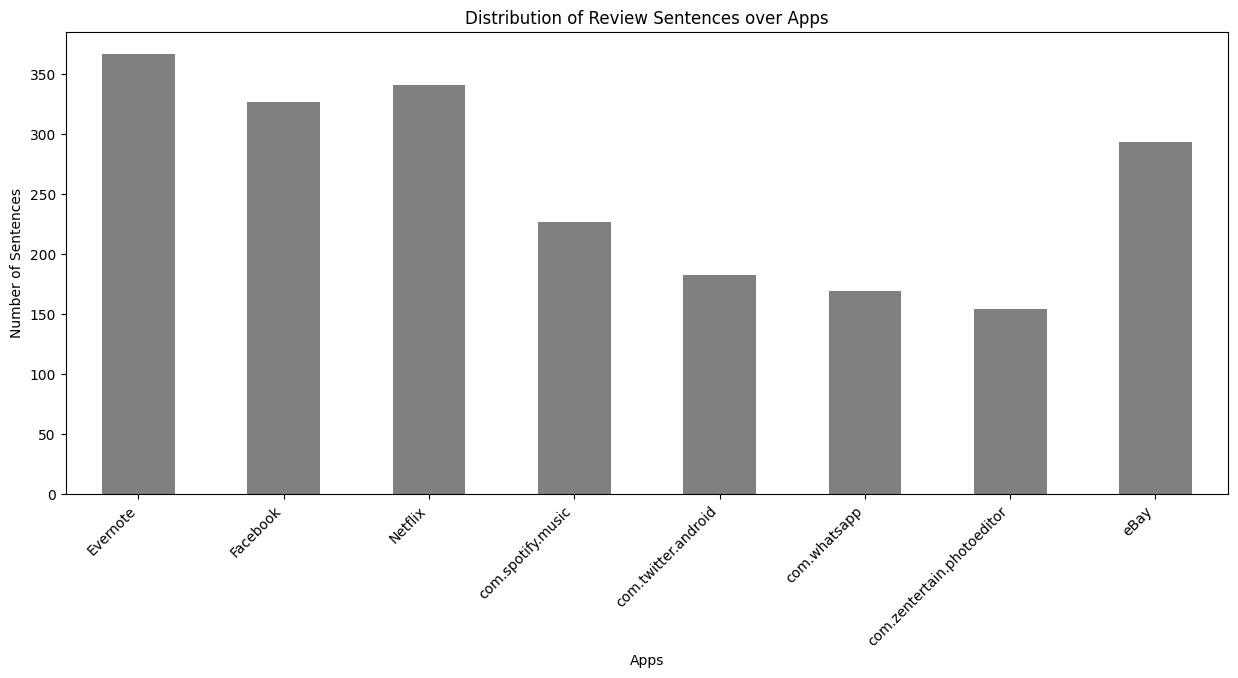

In [6]:
plt.figure(figsize=(15, 6))

df = data.groupby('App id')['Review id'].count()

df.plot(kind='bar', color='gray')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Review Sentences over Apps')
plt.xlabel('Apps')
plt.ylabel('Number of Sentences')
plt.show()

In [29]:
def get_number_re(re_set):
    if pd.isna(re_set):
        return 0
    return len(str(re_set).split(';'))

data['Count All Features'] = data['Feature (All Annotated)'].apply(get_number_re)
data['Count Positive Features'] = data['Feature (Positive)'].apply(get_number_re)
data['Count Negative Features'] = data['Feature (Negative)'].apply(get_number_re)
data['Count Neutral Features'] = data['Feature (Neutral)'].apply(get_number_re)

In [73]:
data['Count All Features'].sum()

1521

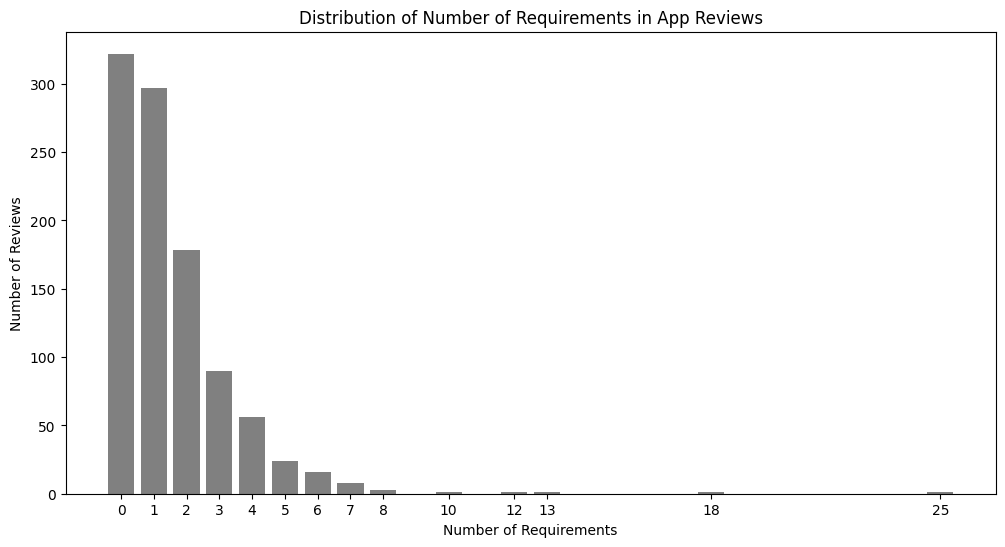

In [65]:
plt.figure(figsize=(12, 6))

df = data.groupby('Review id')['Count All Features'].sum().to_list()
df = Counter(df)
x = list(df.keys())
y = list(df.values())

plt.bar(x, y, color='gray')

plt.xticks(ticks=x, labels=x)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Distribution of Number of Requirements in App Reviews')
plt.xlabel('Number of Requirements')
plt.ylabel('Number of Reviews')

plt.show()

In [38]:
def count_terms(re):
    if pd.isna(re):
        return []
    return [len(req.split()) for req in str(re).split(';') if req.strip()]

data['Count Terms'] = data['Feature (All Annotated)'].apply(count_terms)

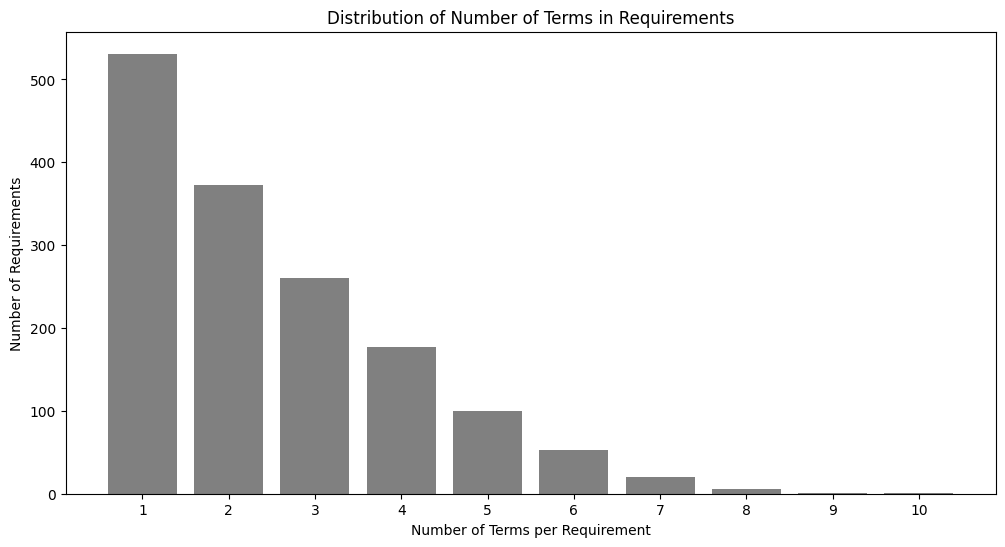

In [58]:
all_term_counts = [count for counts in data['Count Terms'] for count in counts]
all_term_counts = Counter(all_term_counts)
x = list(all_term_counts.keys())
y = list(all_term_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='gray')

plt.xticks(ticks=x, labels=x)
plt.title('Distribution of Number of Terms in Requirements')
plt.xlabel('Number of Terms per Requirement')
plt.ylabel('Number of Requirements')

plt.show()

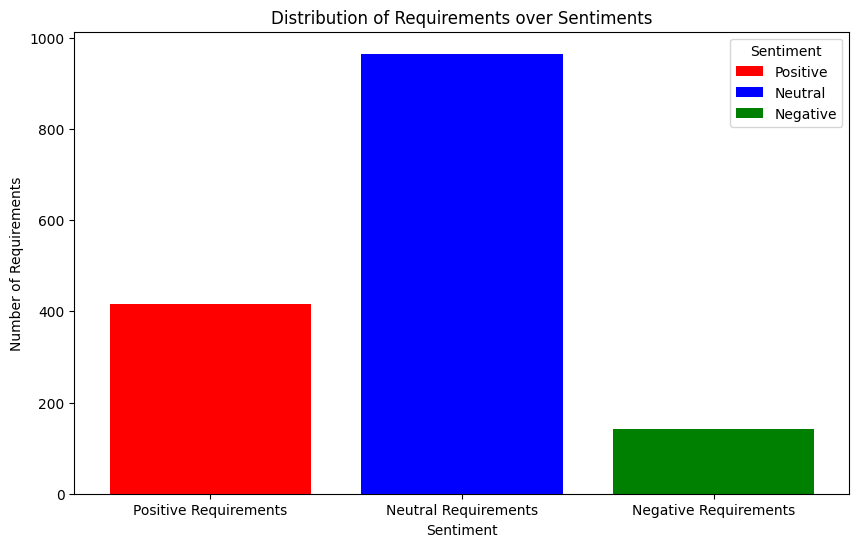

In [72]:
x = ['Positive Requirements', 'Neutral Requirements', 'Negative Requirements']
y = [data['Count Positive Features'].sum(), data['Count Neutral Features'].sum(), data['Count Negative Features'].sum()]
labels = ['Positive', 'Neutral', 'Negative']
colors = ['red', 'blue', 'green']

plt.figure(figsize=(10, 6))
plt.bar(x, y, label=labels, color=colors)

plt.xticks(ticks=x, labels=x)
plt.legend(title='Sentiment')
plt.title('Distribution of Requirements over Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Requirements')

plt.show()

In [75]:
data.to_csv('../datafiles/ground_truth.csv')